Name: Jinhan Cheng, UNI:jc4834

In [2]:
import sklearn as sk
import sklearn.datasets as skdt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, scale
import seaborn as sns 
%matplotlib inline

# 1.1  #

In [3]:
dat = skdt.fetch_california_housing()
data=dat['data']
feature_names=dat['feature_names']
target=dat['target']

downloading Cal. housing from http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz to /Users/hhanchan/scikit_learn_data


Text(0,0.5,u'Distribution of Target')

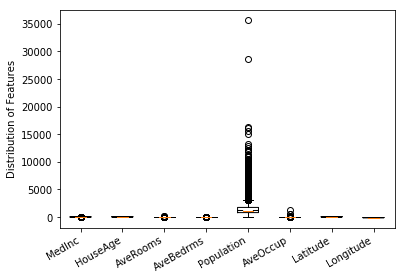

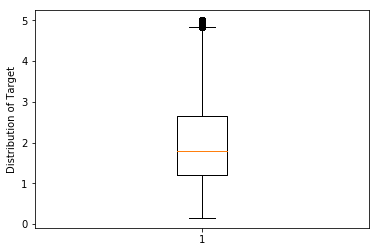

In [4]:
plt.figure(1)
plt.boxplot(dat['data'],dat['feature_names'])
plt.xticks(np.arange(1,data.shape[1]+1),feature_names,rotation=30,ha="right")
plt.ylabel("Distribution of Features")

plt.figure(2)
plt.boxplot(target)
plt.ylabel("Distribution of Target")


In [344]:
plt.show()

It seems that the units of the features are quite different which cause the barplot to vary so much. 
First we could plot the distribution of each feature with barplot and remove the outliers.
Then we can change the unit of each feature to make them more consistent.

# 1.2 #

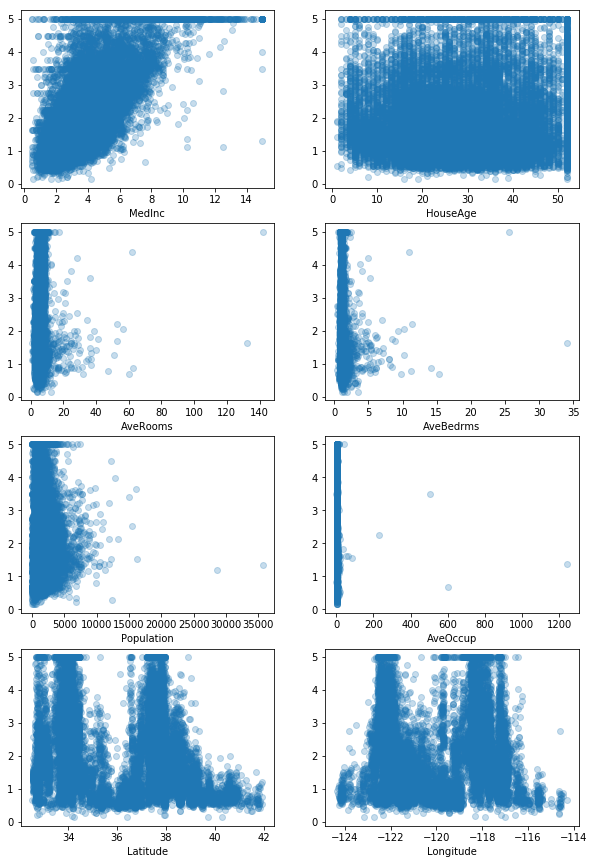

In [345]:
data=pd.DataFrame(data)

fig, ax=plt.subplots(4,2,figsize=(10,15))
for i in range(len(feature_names)):
   plt.subplot(4,2,i+1)
   plt.scatter(data[i],target,alpha=0.25)
   plt.xlabel(feature_names[i])

# 1.3 #

Split data in training and test set

In [5]:
X,y =dat['data'], dat['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Score of LinearRegression using cross-validation with default parameters

In [6]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train))

0.60815919615848146

Score of Ridge using cross-validation with default parameters

In [7]:
np.mean(cross_val_score(Ridge(), X_train, y_train))

0.60817074428967988

Score of Lasso using cross-validation with default parameters

In [8]:
np.mean(cross_val_score(Lasso(), X_train, y_train))

0.29206334283731256

Score of ElasticNet using cross-validation with default parameters

In [9]:
np.mean(cross_val_score(ElasticNet(), X_train, y_train))

0.43000342915830342

Scale the data

In [338]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Score of LinearRegression after scaling

In [319]:
linearregression = LinearRegression().fit(X_train_scaled, y_train)
linearregression.score(X_test_scaled, y_test)

0.5911695436410489

Score of Ridge after scaling

In [320]:
ridge = Ridge().fit(X_train_scaled, y_train)
ridge.score(X_test_scaled, y_test)

0.59116257835107611

Score of Lasso after scaling

In [321]:
lasso = Lasso().fit(X_train_scaled, y_train)
lasso.score(X_test_scaled, y_test)

-0.00040921937725180157

Score of ElasticNet after scaling

In [322]:
elasticnet = ElasticNet().fit(X_train_scaled, y_train)
elasticnet.score(X_test_scaled, y_test)

0.2058227432828823

Both of the scores are lower after scaling

# 1.4 #

Tune the parameters for Ridge using GridSearchCV

In [323]:
param_grid = {'alpha' : np.logspace(-3,3,100)}
g_Ridge = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
g_Ridge.fit(X_train, y_train)
print(g_Ridge.best_params_)
print(g_Ridge.best_score_)
g_Ridge.score(X_test, y_test)

{'alpha': 107.22672220103232}
0.606812329225


0.59013754120581963

This result do not obviously increase compared with the results in 1.3

Plot, blue line indicates mean_train_score, orange line indicates mean_test_score

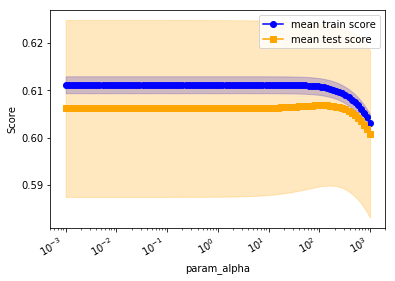

In [324]:
plt.plot(g_Ridge.cv_results_['param_alpha'], g_Ridge.cv_results_['mean_train_score'], marker = 'o', label="mean train score", color='blue')
plt.fill_between(param_grid['alpha'], g_Ridge.cv_results_['mean_train_score'] - g_Ridge.cv_results_['std_train_score'], 
                 g_Ridge.cv_results_['mean_train_score'] + g_Ridge.cv_results_['std_train_score'], alpha=0.25, color='blue')

plt.plot(g_Ridge.cv_results_['param_alpha'], g_Ridge.cv_results_['mean_test_score'], marker = 's', label="mean test score", color='orange')
plt.fill_between(param_grid['alpha'], g_Ridge.cv_results_['mean_test_score'] - g_Ridge.cv_results_['std_test_score'],
                 g_Ridge.cv_results_['mean_test_score'] + g_Ridge.cv_results_['std_test_score'], alpha=0.25,
                 color="orange")

plt.legend(loc="best")
plt.xticks(rotation=30,ha="right")
plt.xscale("log")
plt.xlabel('param_alpha')
plt.ylabel('Score')
plt.show()

Tune the parameters for Lasso using GridSearchCV

In [329]:
param_grid = {'alpha' : np.logspace(-3,0,100)}
g_Lasso = GridSearchCV(Lasso(normalize = True), param_grid, cv=10, return_train_score=True)
g_Lasso.fit(X_train, y_train)
print(g_Lasso.best_params_)
print(g_Lasso.best_score_)
g_Lasso.score(X_test, y_test)

{'alpha': 0.001}
0.492751498068


0.46682052023846582

This result increase compared with the results in 1.3

Plot, blue line indicates mean_train_score, orange line indicates mean_test_score

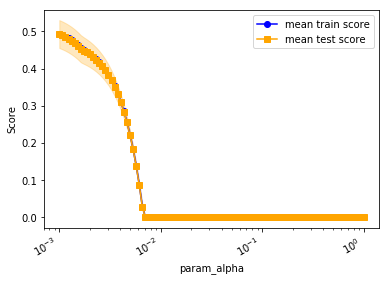

In [330]:
plt.plot(g_Lasso.cv_results_['param_alpha'], g_Lasso.cv_results_['mean_train_score'], marker = 'o', label="mean train score", color='blue')
plt.fill_between(param_grid['alpha'], g_Lasso.cv_results_['mean_train_score'] - 2*g_Lasso.cv_results_['std_train_score'], 
                 g_Lasso.cv_results_['mean_train_score'] + 2*g_Lasso.cv_results_['std_train_score'], alpha=0.25, color='blue')

plt.plot(g_Lasso.cv_results_['param_alpha'], g_Lasso.cv_results_['mean_test_score'], marker = 's', label="mean test score", color='orange')
plt.fill_between(param_grid['alpha'], g_Lasso.cv_results_['mean_test_score'] - 2*g_Lasso.cv_results_['std_test_score'],
                 g_Lasso.cv_results_['mean_test_score'] + 2*g_Lasso.cv_results_['std_test_score'], alpha=0.25,
                 color="orange")

plt.legend(loc="best")
plt.xticks(rotation=30,ha="right")
plt.xscale("log")
plt.xlabel('param_alpha')
plt.ylabel('Score')
plt.show()

Tune the parameters for ElasticNet using GridSearchCV

In [331]:
param_grid = {'alpha' : np.logspace(-4,-1,100), 'l1_ratio':[0.01, .1, .5, .9, .98, 1]}
g_ElasticNet = GridSearchCV(ElasticNet(), param_grid, cv=10, return_train_score=True)
g_ElasticNet.fit(X_train, y_train)
print(g_ElasticNet.best_params_)
print(g_ElasticNet.best_score_)
g_ElasticNet.score(X_test, y_test)

{'alpha': 0.0081113083078968723, 'l1_ratio': 0.01}
0.606810184358


0.58992465018561568

This result increase compared with the results in 1.3

Plot the heatmap

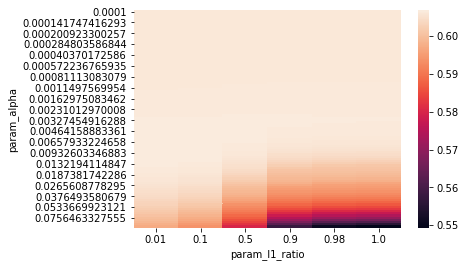

In [332]:
res = pd.pivot_table(pd.DataFrame(g_ElasticNet.cv_results_),
                    values = 'mean_test_score', index = 'param_alpha', columns = 'param_l1_ratio')
sns.heatmap(res)

# 1.5 #

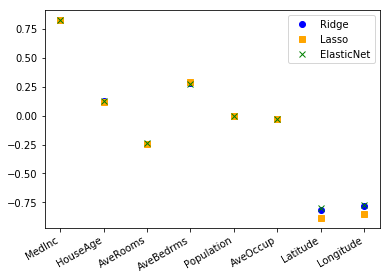

In [346]:
Ridge_best = Ridge(alpha = g_Ridge.best_params_['alpha']).fit(X_train_scaled, y_train)
plt.plot(Ridge_best.coef_, 'o', color = 'blue', label = "Ridge")
Lasso_best = Lasso(alpha = g_Lasso.best_params_['alpha']).fit(X_train_scaled, y_train)
plt.plot(Lasso_best.coef_, 's', color = 'orange', label = "Lasso")
ElasticNet_best = ElasticNet(alpha = g_ElasticNet.best_params_['alpha'],
                     l1_ratio = g_ElasticNet.best_params_['l1_ratio']).fit(X_train_scaled, y_train)
plt.plot(ElasticNet_best.coef_, 'x', color = 'green', label = "ElasticNet")
plt.xticks(np.arange(0,data.shape[1]), feature_names, rotation = 30, ha="right")
plt.legend(loc = 'best')
plt.show()

The results correspond to the importances of the features